## Training a model to classify 11 movements for one subject

##### Dealing with data

In [37]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [38]:
def load_data_DB1(subject,exercise):
    data = loadmat(f'../Dataset/DB1/s{subject}/S{subject}_A1_E{exercise}.mat')
    return data

In [39]:
def get_start_indexes(data,movement,target):
    start_indexes=[]
    for idx,move in enumerate(data[target]):
        if move[0] == movement and data[target][idx-1][0] == 0:
            start_indexes.append(idx)
        if len(start_indexes) == 10:
            break
    return start_indexes

In [45]:
def get_movement_df(data,movement,target):
    start_indexes = get_stimulus_start_indexes(data,movement)
    df= pd.DataFrame()
    step = 500 if target == 'stimulus' else 200
    for i in start_indexes:
        new_row = data['emg'][i:i+step].flatten()
        df = df.append(pd.Series(new_row),ignore_index=True)
    target_movement = np.full((10,1),movement,dtype=int)
    df['target_movement'] = target_movement
    return df

##### Training Models 


###### KNN

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
def get_avg_10_random_states_knn(test_size,random_states,data,target):
    test_scores = []
    training_scores = []
    maxCols = 4999 if target=='stimulus' else 1999
    for r in random_states:
        X_train, X_test, y_train, y_test = train_test_split(data.loc[:,0:maxCols], data['target_movement'], test_size=test_size, random_state=r,shuffle=True)
        y_train = y_train.to_numpy(dtype='Int64')
        y_test = y_test.to_numpy(dtype='Int64')
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train,y_train)
        score = knn.score(X_test,y_test)
        test_scores.append(score)
        training_scores.append(knn.score(X_train,y_train))
    dict = {
        "test_accuracy":sum(test_scores)/len(test_scores),
        "test_scores":test_scores,
        "training_accuracy":sum(training_scores)/len(training_scores)
    }
    return dict

###### SVM

In [42]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
def get_avg_10_random_states_svm(test_size,random_states,data,target):
    test_scores = []
    training_scores = []
    maxCols = 4999 if target=='stimulus' else 1999
    for r in random_states:
        X_train, X_test, y_train, y_test = train_test_split(data.loc[:,0:maxCols], data['target_movement'], test_size=test_size, random_state=r,shuffle=True)
        y_train = y_train.to_numpy(dtype='Int64')
        y_test = y_test.to_numpy(dtype='Int64')
        s = svm.SVC()
        s.fit(X_train, y_train)
        svmScore = s.score(X_test,y_test)
        test_scores.append(svmScore)
        training_scores.append(s.score(X_train,y_train))
    dict = {
        "test_accuracy":sum(test_scores)/len(test_scores),
        "test_scores":test_scores,
        "training_accuracy":sum(training_scores)/len(training_scores),
    }
    return dict

#### Classifying movements using svm and knn

In [43]:
def classify_movements(test_size,random_states,data,target):
    out_knn = get_avg_10_random_states_knn(random_states=random_states,test_size=0.25,data=data,target=target)

    out_svm = get_avg_10_random_states_svm(random_states=random_states,test_size=0.25,data=data,target=target)

    fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    
    ax1.plot(range(1,11),out_svm["test_scores"])
    ax1.set(title='SVM Accuracy',xlabel='Random States',ylabel='Scores');
    
    #fig,ax = plt.subplots(figsize=(10,10))
    ax2.plot(range(1,11),out_knn["test_scores"])
    ax2.set(title='KNN Accuracy',xlabel='Random States',ylabel='Scores');

    print("Avg Accuracy on training set of KNN model: ", out_knn["training_accuracy"])
    print("Avg Accuracy for test set of KNN model: ", out_knn["test_accuracy"])
    print("Avg Accuracy on training set of SVM model: ", out_svm["training_accuracy"])
    print("Avg Accuracy for test set of SVM model: ", out_svm["test_accuracy"])
    

#### Classification of the first 11 movements in exercise 1 for subject 4

In [61]:
sub4_ex1 = load_data_DB1(subject=4,exercise=1)
movements_ex1 = []
for idx in range(1,12):
    movements_ex1.append(get_movement_df(data=sub4_ex1,movement=idx,target='stimulus'))

In [62]:
# Add All moves to one dataframe
movements_ex1_concat = pd.concat(movements_ex1,ignore_index=True)

#### Classification based on stimulus

Avg Accuracy on training set of KNN model:  0.9158536585365855
Avg Accuracy for test set of KNN model:  0.7750000000000001
Avg Accuracy on training set of SVM model:  0.9109756097560975
Avg Accuracy for test set of SVM model:  0.7607142857142858


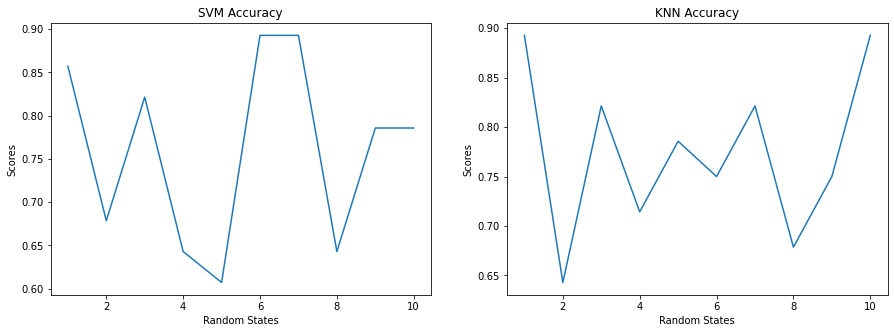

In [63]:
random_states = [0,1,42,101,500,63,84,36,111,99]
classify_movements(test_size=0.25,random_states=random_states,data=movements_ex1_concat,target='stimulus')

#### Classification based on restimulus

Avg Accuracy on training set of KNN model:  0.874390243902439
Avg Accuracy for test set of KNN model:  0.7499999999999999
Avg Accuracy on training set of SVM model:  0.8109756097560975
Avg Accuracy for test set of SVM model:  0.5750000000000001


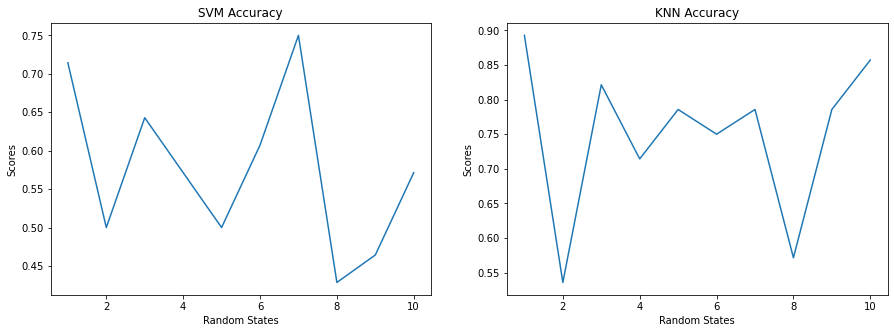

In [64]:
random_states = [0,1,42,101,500,63,84,36,111,99]
classify_movements(test_size=0.25,random_states=random_states,data=movements_ex1_concat,target='restimulus')

#### Classification of the first 11 movements in exercise 2 for subject 4

In [65]:
sub4_ex2 = load_data_DB1(subject=4,exercise=2)
movements_ex2 = []
for idx in range(1,12):
    movements_ex2.append(get_movement_df(data=sub4_ex2,movement=idx,target='stimulus'))

In [66]:
# Add All moves to one dataframe
movements_ex2_concat = pd.concat(movements_ex2,ignore_index=True)

#### Classification based on stimulus

Avg Accuracy on training set of KNN model:  0.9012195121951219
Avg Accuracy for test set of KNN model:  0.7214285714285714
Avg Accuracy on training set of SVM model:  0.8951219512195122
Avg Accuracy for test set of SVM model:  0.6678571428571429


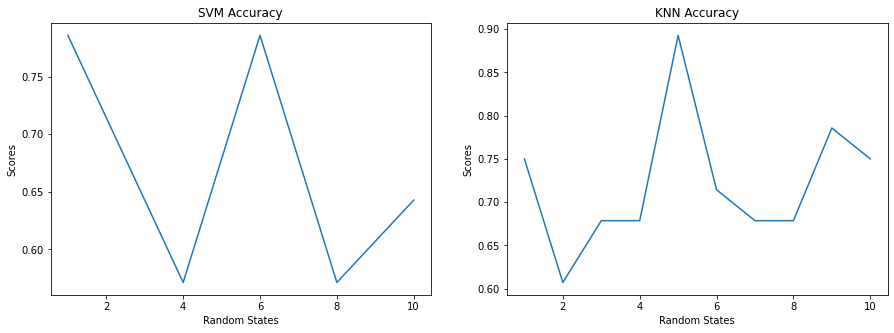

In [67]:
random_states = [0,1,42,101,500,63,84,36,111,99]
classify_movements(test_size=0.25,random_states=random_states,data=movements_ex2_concat,target='stimulus')

#### Classification based on resimulus

Avg Accuracy on training set of KNN model:  0.8317073170731708
Avg Accuracy for test set of KNN model:  0.6321428571428571
Avg Accuracy on training set of SVM model:  0.7439024390243901
Avg Accuracy for test set of SVM model:  0.4928571428571429


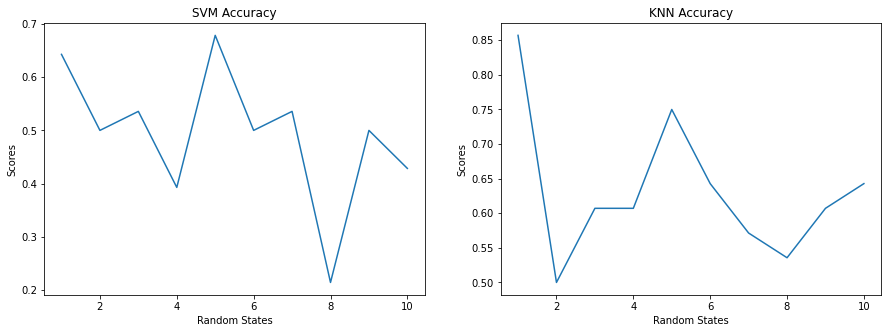

In [68]:
random_states = [0,1,42,101,500,63,84,36,111,99]
classify_movements(test_size=0.25,random_states=random_states,data=movements_ex2_concat,target='restimulus')

#### Classification of the first 11 movements in exercise 3 for subject 4

In [69]:
sub4_ex3 = load_data_DB1(subject=4,exercise=3)
movements_ex3 = []
for idx in range(1,12):
    movements_ex3.append(get_movement_df(data=sub4_ex3,movement=idx,target='stimulus'))

In [70]:
# Add All moves to one dataframe
movements_ex3_concat = pd.concat(movements_ex3,ignore_index=True)

#### Classification based on stimulus

Avg Accuracy on training set of KNN model:  0.8621951219512196
Avg Accuracy for test set of KNN model:  0.7285714285714284
Avg Accuracy on training set of SVM model:  0.7719512195121951
Avg Accuracy for test set of SVM model:  0.5392857142857144


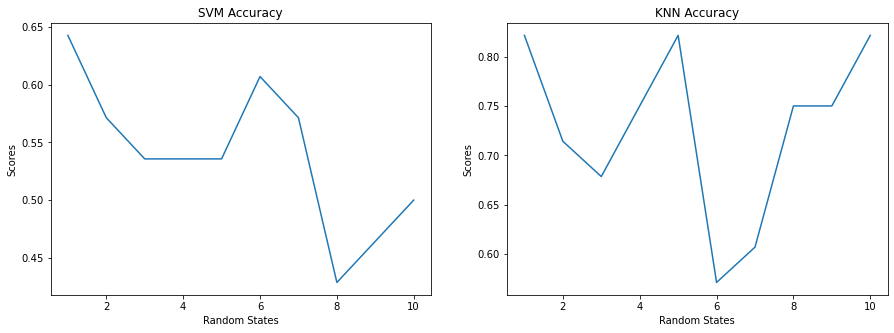

In [71]:
random_states = [0,1,42,101,500,63,84,36,111,99]
classify_movements(test_size=0.25,random_states=random_states,data=movements_ex3_concat,target='stimulus')

#### Classification based on restimulus


Avg Accuracy on training set of KNN model:  0.7658536585365854
Avg Accuracy for test set of KNN model:  0.5678571428571428
Avg Accuracy on training set of SVM model:  0.5841463414634147
Avg Accuracy for test set of SVM model:  0.39285714285714285


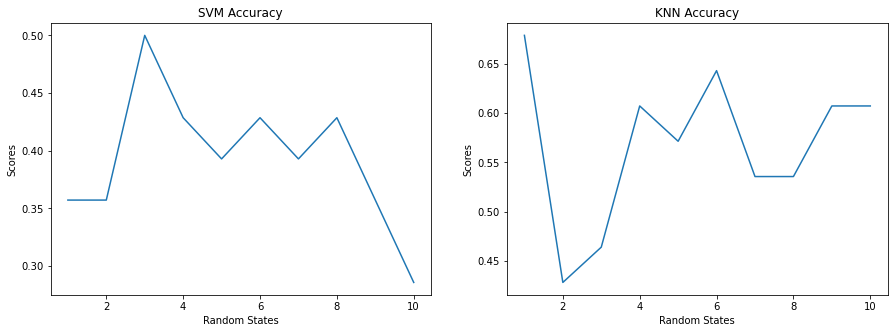

In [72]:
random_states = [0,1,42,101,500,63,84,36,111,99]
classify_movements(test_size=0.25,random_states=random_states,data=movements_ex3_concat,target='restimulus')

### Classifying the movements based on restimulus column

In [73]:
sub4_ex1 = load_data_DB1(subject=4,exercise=1)
movements_ex1 = []
for idx in range(1,12):
    movements_ex1.append(get_movement_df(data=sub4_ex1,movement=idx,target='restimulus'))

In [84]:
st = get_start_indexes(data=sub4_ex1,movement=3,target='restimulus')
st

[17230, 17981, 18764, 19552, 20477, 21334, 22140, 23038, 23807, 24668]

In [90]:
sub4_ex1['restimulus'][21334]

array([3], dtype=uint8)